In [1]:
import subprocess
spec_file_address = "https://cse.unl.edu/~pquint/teaching/unl_classes/cse496dl/rl_hackathon/spec-file.txt"
env_name = "rl_tensorflow"

subprocess.call("curl -o spec-file.txt {}".format(spec_file_address), shell=True)
subprocess.call("conda create --name {} --file spec-file.txt".format(env_name), shell=True)
subprocess.call("python -m ipykernel install --user --name \"$CONDA_DEFAULT_ENV\" --display-name \"Python ($CONDA_DEFAULT_ENV)\"", shell=True)

1

In [2]:
# We'll start with our library imports...
from __future__ import print_function

import collections
import math
import os
import random

import numpy as np
import tensorflow as tf

import atari_wrappers           # from OpenAI Baselines
import gym                      # for the RL environments
from gym import wrappers
from IPython import display
import matplotlib
import matplotlib.pyplot as plt # for plots
%matplotlib inline

files = '/work/cse496dl/teams/Dropouts/3_Homework/test_agent/target/'
print('Done')

Done


In [3]:
session = tf.Session()
saver = tf.train.import_meta_graph(files + 'homework_3.meta')
saver.restore(session,files + 'homework_3')
graph = session.graph
x = graph.get_tensor_by_name('input_placeholder:0')
output = graph.get_tensor_by_name('output:0')

INFO:tensorflow:Restoring parameters from /work/cse496dl/teams/Dropouts/3_Homework/test_agent/target/homework_3


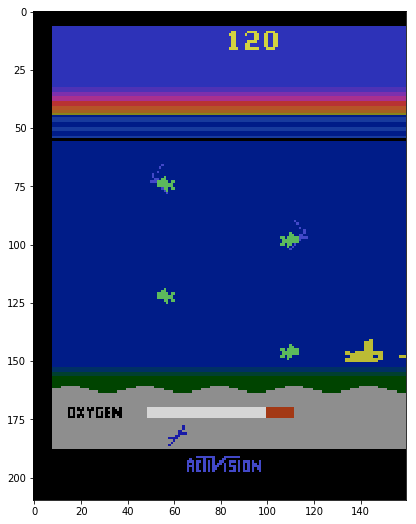

In [ ]:
env = atari_wrappers.wrap_deepmind(atari_wrappers.make_atari('SeaquestNoFrameskip-v4'), clip_rewards=False, frame_stack=True)


plt.figure(figsize=(9,9))
img = plt.imshow(env.render(mode='rgb_array'))
total_rewards = 0
for _ in range(5):
    observations = env.reset()
    observations = np.array(observations).reshape(1, 84, 84, 4)
    while True:
        img.set_data(env.render(mode='rgb_array'))
        display.display(plt.gcf())
        display.clear_output(wait=True)
        
        Qs = session.run(output, feed_dict = {x: observations})
                             
        action = np.argmax(Qs)
        next_obs, reward, done, _ = env.step(action)

        total_rewards += reward
        if done:
            print ("Score: ", total_rewards)
            break

        observations =  np.array(next_obs).reshape(1, 84,84, 4)
    
env.close()